# Next Word Prediction

BY - chakrapani vangmai

Importing the Libraries

In [2]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

Uploading Dataset from system

In [3]:
#Loading the data
text = open('C:\\Users\\vangm\\Downloads\\1661-0.txt', encoding="utf8").read().lower()
print('corpus length:', len(text))


corpus length: 581533


Data Preprocessing

In [4]:
#Data Preprocessing
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
 
print(f'unique chars: {len(character)}')

unique chars: 72


In [5]:
#chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193831


In [6]:
# generating our features and labels
#one hot encoding
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]

C:\Users\vangm\AppData\Local\Temp/ipykernel_10664/2530158343.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
C:\Users\vangm\AppData\Local\Temp/ipykernel_10664/2530158343.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), len(character)), dtype=

'l'

In [7]:
#one hot encoded data
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True])

In [8]:
#one hot encoded data
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [9]:
X.shape

(193831, 40, 72)

In [10]:
y.shape

(193831, 72)

Creating the model

In [11]:
# Creating the model
model = Sequential()
model.add(LSTM(500, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

Model summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 500)               1146000   
                                                                 
 dense (Dense)               (None, 72)                36072     
                                                                 
 activation (Activation)     (None, 72)                0         
                                                                 
Total params: 1,182,072
Trainable params: 1,182,072
Non-trainable params: 0
_________________________________________________________________


Training our model

In [13]:
# Training our model
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=10, 
                    shuffle=True).history

Epoch 1/10
1500/1500 [==============================] - 1006s 668ms/step - loss: 1.9828 - accuracy: 0.4254 - val_loss: 2.0437 - val_accuracy: 0.4528
Epoch 2/10
1500/1500 [==============================] - 993s 662ms/step - loss: 1.5314 - accuracy: 0.5394 - val_loss: 1.8899 - val_accuracy: 0.4863
Epoch 3/10
1500/1500 [==============================] - 1007s 671ms/step - loss: 1.4167 - accuracy: 0.5716 - val_loss: 1.9101 - val_accuracy: 0.5126
Epoch 4/10
1500/1500 [==============================] - 750s 500ms/step - loss: 1.3495 - accuracy: 0.5904 - val_loss: 2.0050 - val_accuracy: 0.4750
Epoch 5/10
1500/1500 [==============================] - 728s 485ms/step - loss: 1.2995 - accuracy: 0.6026 - val_loss: 1.9160 - val_accuracy: 0.5121
Epoch 6/10
1500/1500 [==============================] - 734s 490ms/step - loss: 1.2674 - accuracy: 0.6089 - val_loss: 2.0706 - val_accuracy: 0.5059
Epoch 7/10
1500/1500 [==============================] - 753s 502ms/step - loss: 1.2404 - accuracy: 0.6177 - va

saving our model

In [14]:
#saving our model
model.save('nextword.h5')
pickle.dump(history, open("history.p", "wb"))

loading our model

In [15]:
#loading our model
model = load_model('nextword.h5')
history = pickle.load(open("history.p", "rb"))

Model Evaluation

In [16]:
#Model Evaluation
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6058/6058 [==============================] - 872s 144ms/step - loss: 1.1996 - accuracy: 0.6315
Test Loss 1.199609398841858
Test Accuracy 0.631524384021759


Plotting training and validation plots

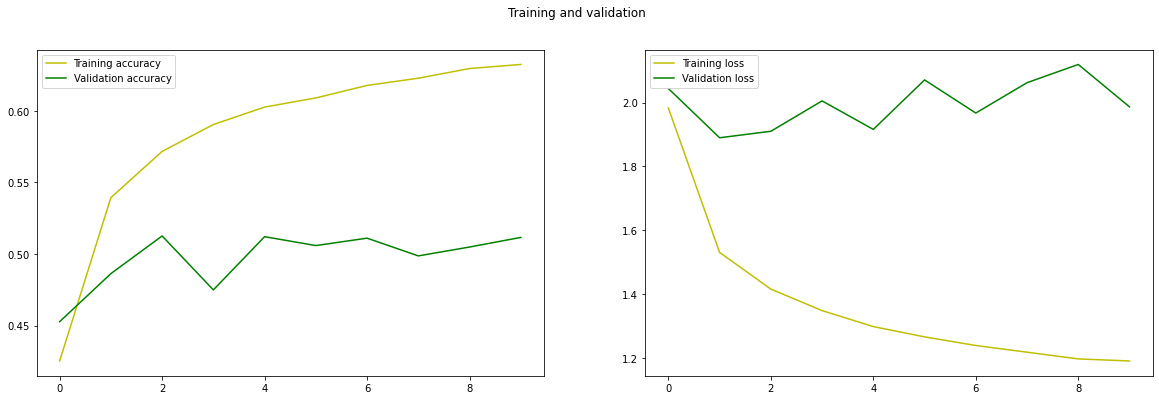

In [17]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [ ]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

prepare_input("This is an example of input of our model".lower())

Functions to get next probable characters

In [ ]:
#functions to get next probable characters
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [ ]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [ ]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

# Prediction

In [ ]:
#Prediction
quotes = [   
    "It is not a lack of  love, but a  lack of friendship that makes unhappy marriages.",
    "Recurrent neural network (RNN)is a type of artificial neural network which uses sequential data or time series data.",
    "Machine learning is the science of getting computers to act without being explicitly programmed.",
    "Deep learning is subset of machine learning,which is essentially a neural network with three or more layers.",
    "The goal of AI is to  make a  compter like humans to solve complex problems.",
    "Statistics are defined as numerical data, and is the field of math that deals with the collection, tabulation and interpretation of numerical data."
    ]

In [24]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

it is not a lack of  love, but a  lack o
['f ', 'n ', 'r ', 'ut ', 'ver ']

recurrent neural network (rnn)is a type 
['and ', 'the ', 'which ', 'him ', 'in ']

machine learning is the science of getti
['ng ', 'cts ', 'ly ', 'on ', 've, ']

deep learning is subset of machine learn
['ing ', 'ce. ', '. ', ', ', 'and.\n\n“it ']

the goal of ai is to  make a  compter li
['ttle\nstairs, ', 'ne ', 'ce ', 'fe ', 'ke ']

statistics are defined as numerical data
['. ', ', ', '\nof ', '?’ ', 'fice ']



# Model Has been successfully tested